### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Import data set

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)


### Take a look a data

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Let's remove unnecessary columns and rename few columns

In [4]:
df_can.drop(columns=['Type','Coverage', 'AREA','REG','DEV','DevName'], inplace=True)

In [5]:
df_can.rename({'OdName':'Country','AreaName': 'Continent','RegName':'Region'}, inplace=True, axis=1)

In [6]:
df_can.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [7]:
years = np.arange(1980, 2014)

#### Create a Total column by taking sum aling row

In [8]:
df_can['Total'] = df_can[years].sum(axis=1, skipna=True)

In [9]:
df_can.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


#### Get top 5 countries by Total

In [10]:
 df_can.sort_values(by='Total', inplace=True, ascending=False)

In [11]:
df_top5 =df_can.head()

In [12]:
df_top5

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [13]:
total_immigrants = df_top5['Total'].sum(axis=0)

#### We need only countryname and Total columns.

In [14]:
df_top5 = df_top5[['Country','Total']]

In [15]:
proportion_by_country = df_top5['Total']/total_immigrants 

In [16]:
proportion_by_country

79     0.260471
36     0.248446
183    0.207615
136    0.192516
130    0.090952
Name: Total, dtype: float64

#### We will create array of 10 rows and 50 columns and calculate number of tiles by country from above proportion

In [17]:
arr = np.zeros((10,50))

In [18]:
tiles_by_country = [round(500 * val) for val in proportion_by_country ]

In [19]:
tiles_by_country

[130, 124, 104, 96, 45]

### We will fill 10 * 50 matrix with code for each country
#### 130 tiles for India, 124 tiles for China....

In [20]:
category_index = 0
tile_index = 0

In [21]:
for col in range(50):
    for row in range(10):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_by_country[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        arr[row, col] = category_index

In [22]:
arr

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
        5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
        5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
        5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
        5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 

### Plot Waffle chart

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

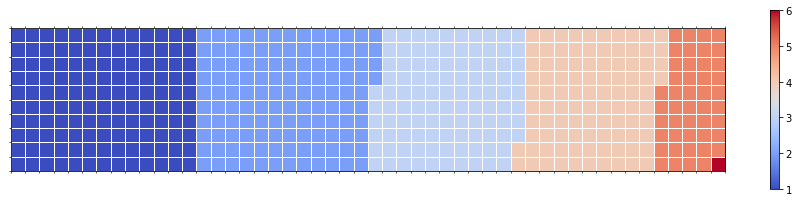

In [24]:

fig = plt.figure()
plt.figure(figsize=(10,8))
cm = plt.cm.coolwarm
plt.matshow(arr, cmap=cm)
plt.colorbar()
# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (50), 1), minor=True)
ax.set_yticks(np.arange(-.5, (10), 1), minor=True)
#ax.set_xticks(np.arange(-.5, (50), 5), minor=True)    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
#ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
plt.xticks([])
plt.yticks([])
plt.show()